In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/화공인공지능

/content/drive/MyDrive/Colab Notebooks/화공인공지능


In [3]:
import pandas as pd
data = pd.read_csv('./Data/data0.csv', index_col=0)
data_test = pd.read_csv('./Data/data0_test.csv', index_col=0)
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,XMEAS11,XMEAS12,XMEAS13,XMEAS14,XMEAS15,XMEAS16,XMEAS17,XMEAS18,XMEAS19,XMEAS20,XMEAS21,XMEAS22,XMEAS23,XMEAS24,XMEAS25,XMEAS26,XMEAS27,XMEAS28,XMEAS29,XMEAS30,XMEAS31,XMEAS32,XMEAS33,XMEAS34,XMEAS35,XMEAS36,XMEAS37,XMEAS38,XMEAS39,XMEAS40,XMEAS41
0,0.24889,3702.3,4502.7,9.4170,26.996,42.183,2705.2,75.173,120.40,0.33611,80.068,50.462,2633.4,25.184,50.201,3102.8,22.617,65.724,228.65,341.00,94.592,77.274,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828
1,0.24904,3666.2,4526.0,9.2682,26.710,42.332,2705.5,74.411,120.41,0.33676,80.095,51.906,2634.4,26.589,49.824,3102.2,22.583,65.726,229.63,341.44,94.686,77.383,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828
2,0.25034,3673.3,4501.3,9.4212,26.842,42.360,2705.3,75.125,120.41,0.33739,80.199,50.469,2634.6,24.494,48.957,3104.0,23.591,65.757,228.44,341.11,94.568,77.546,32.222,8.9441,26.076,6.7883,18.672,1.6665,33.011,13.751,23.756,1.1904,18.961,2.2628,4.8707,2.2701,0.017866,0.8357,0.098577,53.724,43.828
3,0.25109,3657.8,4497.8,9.3792,26.528,41.982,2707.3,73.992,120.38,0.33664,80.329,48.215,2635.9,27.367,49.708,3104.7,22.097,65.787,230.12,341.34,94.623,77.569,32.222,8.9441,26.076,6.7883,18.672,1.6665,33.011,13.751,23.756,1.1904,18.961,2.2628,4.8707,2.2701,0.017866,0.8357,0.098577,53.724,43.828
4,0.24563,3698.0,4537.4,9.3746,26.736,42.354,2705.3,75.283,120.42,0.32521,80.130,49.518,2634.1,22.341,49.662,3103.5,22.854,65.790,230.09,341.24,94.399,77.158,32.198,8.9947,26.188,6.9876,18.652,1.6479,33.387,13.796,23.854,1.1715,18.900,2.2754,4.8080,2.2547,0.017866,0.8357,0.098577,53.724,43.828


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   XMEAS1   960 non-null    float64
 1   XMEAS2   960 non-null    float64
 2   XMEAS3   960 non-null    float64
 3   XMEAS4   960 non-null    float64
 4   XMEAS5   960 non-null    float64
 5   XMEAS6   960 non-null    float64
 6   XMEAS7   960 non-null    float64
 7   XMEAS8   960 non-null    float64
 8   XMEAS9   960 non-null    float64
 9   XMEAS10  960 non-null    float64
 10  XMEAS11  960 non-null    float64
 11  XMEAS12  960 non-null    float64
 12  XMEAS13  960 non-null    float64
 13  XMEAS14  960 non-null    float64
 14  XMEAS15  960 non-null    float64
 15  XMEAS16  960 non-null    float64
 16  XMEAS17  960 non-null    float64
 17  XMEAS18  960 non-null    float64
 18  XMEAS19  960 non-null    float64
 19  XMEAS20  960 non-null    float64
 20  XMEAS21  960 non-null    float64
 21  XMEAS22  960 non

In [5]:
data.describe()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,XMEAS11,XMEAS12,XMEAS13,XMEAS14,XMEAS15,XMEAS16,XMEAS17,XMEAS18,XMEAS19,XMEAS20,XMEAS21,XMEAS22,XMEAS23,XMEAS24,XMEAS25,XMEAS26,XMEAS27,XMEAS28,XMEAS29,XMEAS30,XMEAS31,XMEAS32,XMEAS33,XMEAS34,XMEAS35,XMEAS36,XMEAS37,XMEAS38,XMEAS39,XMEAS40,XMEAS41
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,0.250248,3661.501458,4510.966667,9.344141,26.902084,42.327602,2705.660625,75.019136,120.400177,0.336858,80.086668,49.929684,2634.419271,25.186377,49.958648,3102.884375,22.906916,65.853096,234.017313,341.424948,94.605131,77.279077,32.189417,8.896969,26.403192,6.882574,18.770969,1.656633,32.959079,13.824604,23.989117,1.253523,18.550575,2.264873,4.837777,2.300008,0.018524,0.835457,0.098100,53.711568,43.872766
std,0.030905,34.810922,38.785931,0.079748,0.205124,0.220598,6.886190,0.527790,0.019850,0.012198,0.228435,1.032327,7.173959,1.039884,1.041349,6.167169,0.601327,0.464070,10.796963,1.557367,0.128324,0.262288,0.288417,0.104107,0.310748,0.109934,0.282458,0.024885,0.346427,0.105260,0.379457,0.105945,0.322225,0.025719,0.065256,0.054101,0.010203,0.017408,0.010164,0.503013,0.547915
min,0.166680,3566.100000,4412.800000,9.091100,26.358000,41.617000,2689.900000,73.302000,120.340000,0.294070,79.351000,46.400000,2617.700000,21.473000,46.610000,3088.800000,20.866000,64.304000,197.480000,336.250000,94.193000,76.445000,31.272000,8.573200,25.622000,6.602800,17.925000,1.580900,31.960000,13.525000,23.012000,0.984050,17.573000,2.193000,4.629500,2.137200,-0.006381,0.782680,0.074284,52.463000,42.473000
25%,0.230555,3636.150000,4482.875000,9.289575,26.772750,42.183000,2700.400000,74.660000,120.390000,0.329802,79.925750,49.229500,2629.000000,24.512750,49.230500,3098.200000,22.511500,65.630000,228.772500,340.400000,94.517750,77.106750,32.004750,8.827025,26.185750,6.802975,18.560000,1.641100,32.704250,13.761000,23.721000,1.181800,18.333500,2.246600,4.795650,2.266425,0.010945,0.823525,0.091013,53.348500,43.436500
50%,0.250460,3663.700000,4511.600000,9.344300,26.903000,42.322500,2704.900000,75.004500,120.400000,0.337205,80.090500,49.961000,2633.700000,25.216000,49.960500,3102.250000,22.908500,65.920500,234.305000,341.470000,94.603000,77.268500,32.177000,8.897000,26.396500,6.883250,18.767000,1.658300,32.971500,13.829000,23.963500,1.248050,18.577500,2.264550,4.837000,2.298850,0.018736,0.836545,0.096829,53.714000,43.851500
75%,0.269663,3686.375000,4538.000000,9.396125,27.035250,42.477000,2710.700000,75.363500,120.410000,0.344522,80.248500,50.616250,2639.600000,25.869750,50.677500,3107.400000,23.322500,66.121000,240.007500,342.352500,94.696000,77.457250,32.382250,8.964250,26.597000,6.959150,18.971500,1.673325,33.188000,13.893000,24.240250,1.317675,18.765500,2.284025,4.879525,2.334550,0.025405,0.846190,0.104475,54.091750,44.241750
max,0.356920,3756.100000,4634.900000,9.601500,27.511000,42.964000,2724.700000,76.631000,120.460000,0.370880,80.697000,53.512000,2654.100000,28.367000,54.089000,3121.000000,24.705000,66.975000,261.950000,345.320000,94.966000,78.101000,33.002000,9.182400,27.312000,7.230600,19.557000,1.737500,34.082000,14.121000,25.140000,1.604500,19.418000,2.327900,5.028700,2.508100,0.047386,0.882660,0.123600,55.012000,45.445000


In [4]:
from sklearn.model_selection import train_test_split
test_ratio = 0.2
random_state = 42
data_train, data_val = train_test_split(data, test_size=test_ratio, random_state=random_state)
print(data_train.shape, data_val.shape, data_test.shape)

(768, 41) (192, 41) (500, 41)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(data_train)
X_val_scaled = scaler.transform(data_val)
X_test_scaled = scaler.transform(data_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

def Autoencoder(input_dim, num_nodes, num_latents, learning_rate):
  model=Sequential()
  model.add(Dense(num_nodes, input_shape=(input_dim,)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(num_latents))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(num_nodes))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(input_dim, activation='linear'))
  optimizer = Adam(learning_rate, decay=0.001)
  model.compile(loss='mse', metrics='mae', optimizer=optimizer)
  return model


In [7]:
input_dim = X_train_scaled.shape[1]
num_nodes = 64
num_latents = 28
learning_rate =  0.01
ae_model = Autoencoder(input_dim, num_nodes, num_latents, learning_rate)
ae_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
 batch_normalization_1 (Batc  (None, 28)               112       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28)                0

In [44]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

patience = 20 
earlystopping = EarlyStopping(patience=patience, monitor='val_loss')
checkpointer = ModelCheckpoint(filepath="best model.h5", verbose=0, save_best_only=True)
history = model.fit(X_train_scaled, X_train_scaled, validation_data=(X_val_scaled, X_val_scaled), epochs=1000, batch_size=64,
                    callbacks=[earlystopping, checkpointer])

Epoch 1/1000
12/12 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.0514 - val_loss: 0.0052 - val_mae: 0.0549
Epoch 2/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.0043 - mae: 0.0511 - val_loss: 0.0052 - val_mae: 0.0549
Epoch 3/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.0043 - mae: 0.0508 - val_loss: 0.0052 - val_mae: 0.0549
Epoch 4/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0045 - mae: 0.0519 - val_loss: 0.0052 - val_mae: 0.0549
Epoch 5/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0043 - mae: 0.0508 - val_loss: 0.0052 - val_mae: 0.0549
Epoch 6/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0043 - mae: 0.0511 - val_loss: 0.0052 - val_mae: 0.0549
Epoch 7/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.0042 - mae: 0.0504 - val_loss: 0.0052 - val_mae: 0.0549
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss

In [8]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = load_model('best model.h5')
X_pred = model.predict(X_test_scaled)
mse = mean_squared_error(X_test_scaled, X_pred)
mae = mean_absolute_error(X_test_scaled, X_pred)
print('Mean squared error : ', mse)
print('Mean absolute error : ', mae)

Mean squared error :  0.005577798614166516
Mean absolute error :  0.05629218144753314


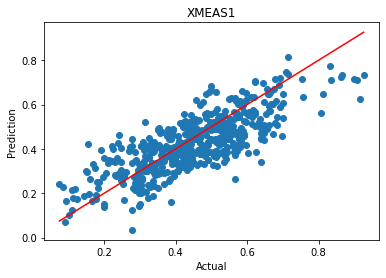

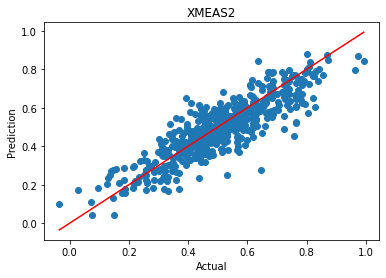

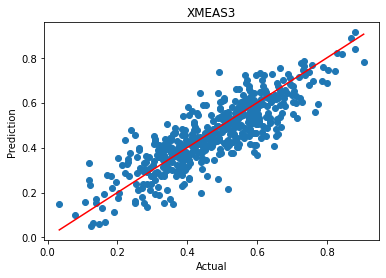

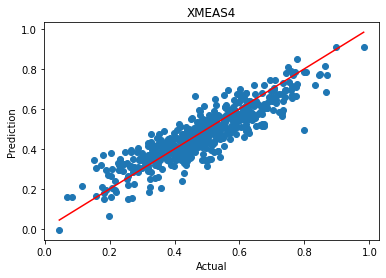

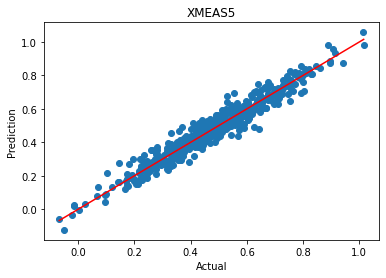

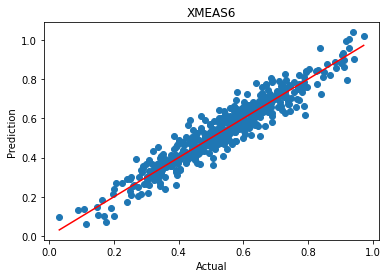

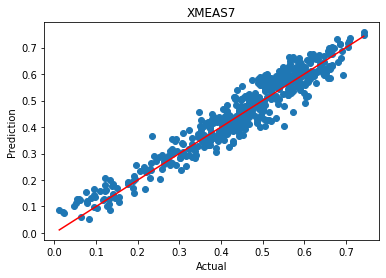

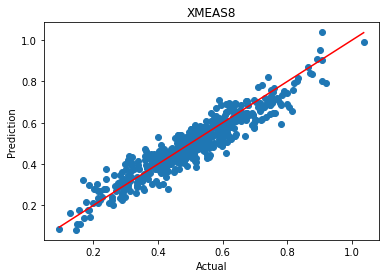

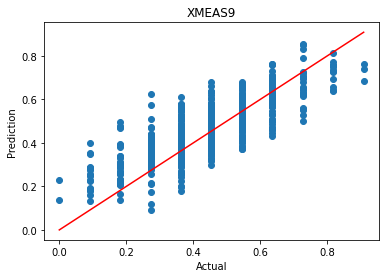

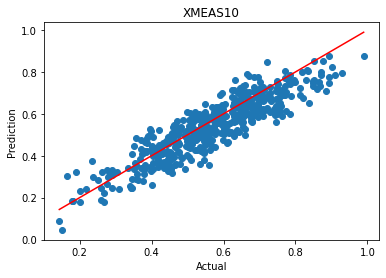

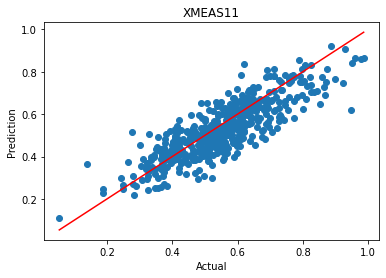

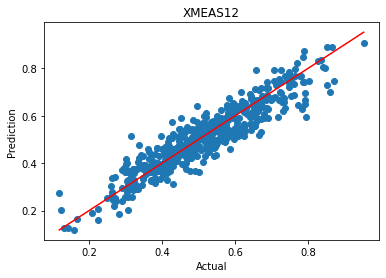

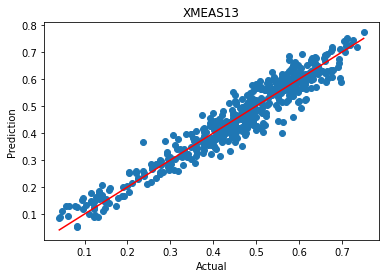

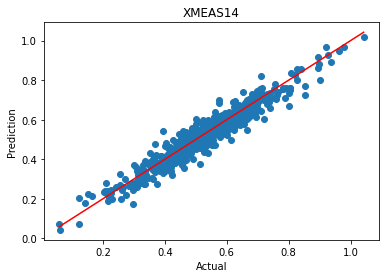

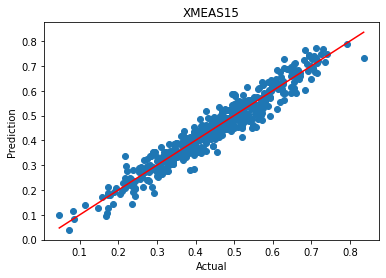

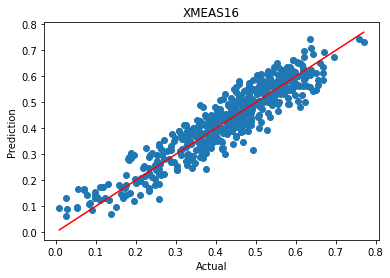

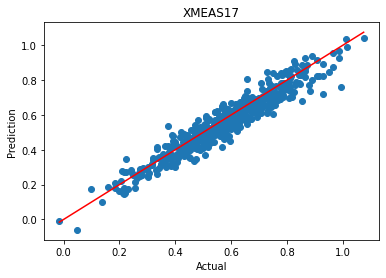

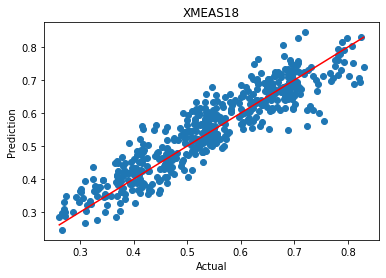

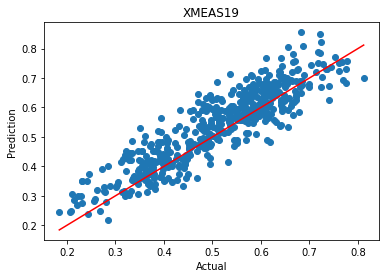

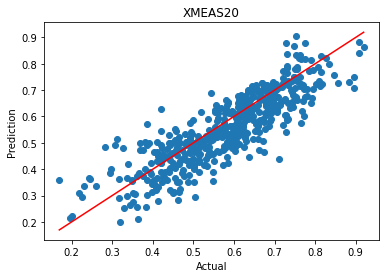

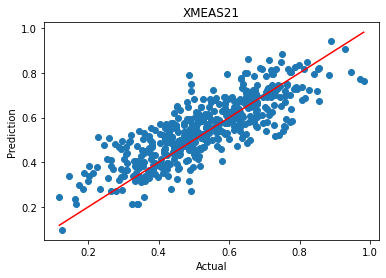

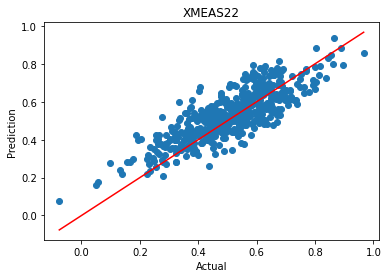

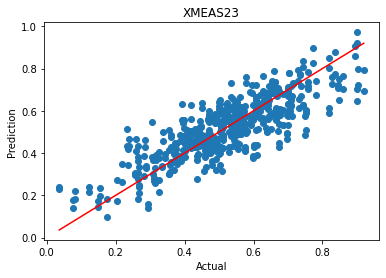

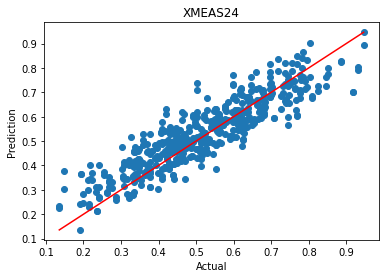

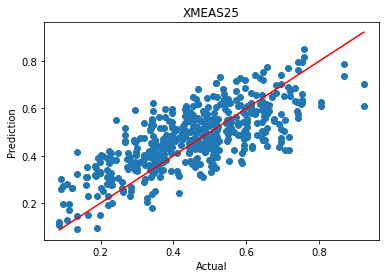

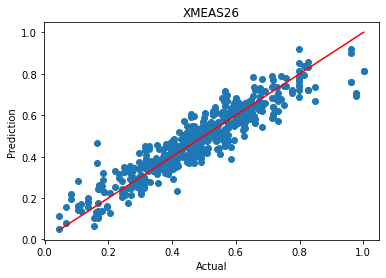

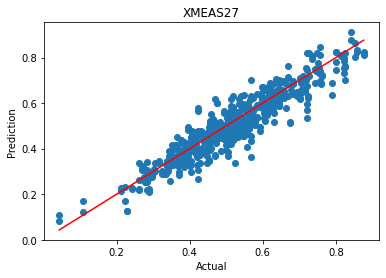

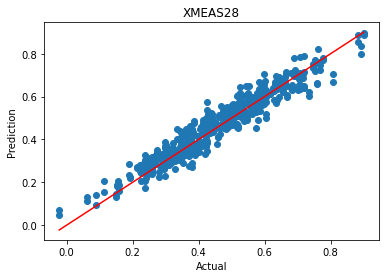

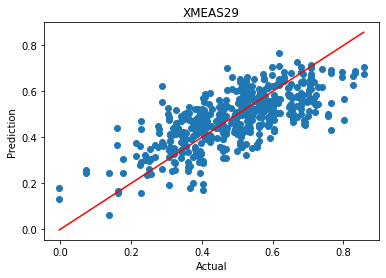

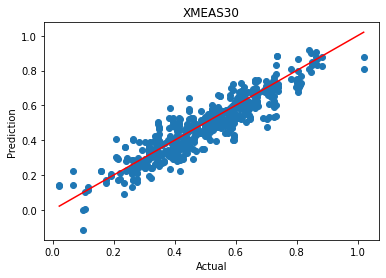

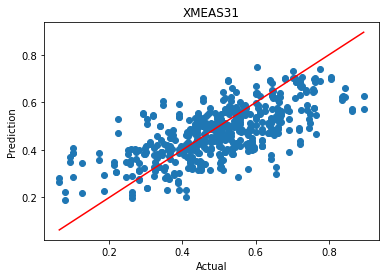

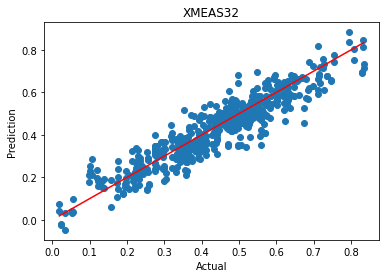

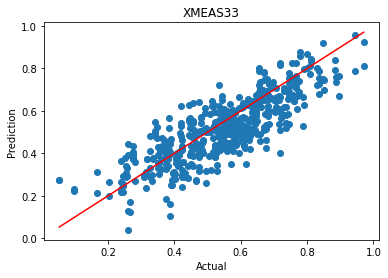

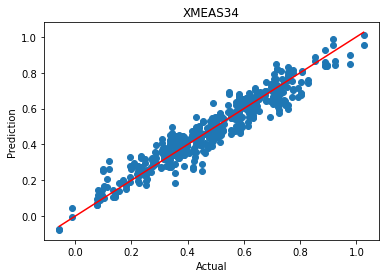

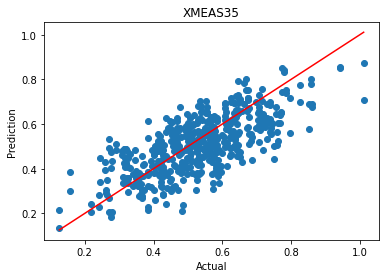

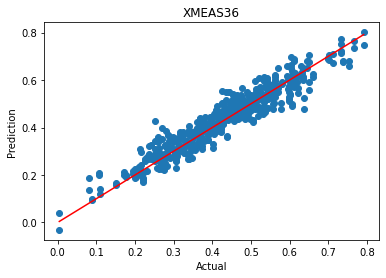

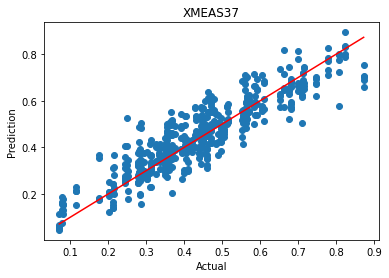

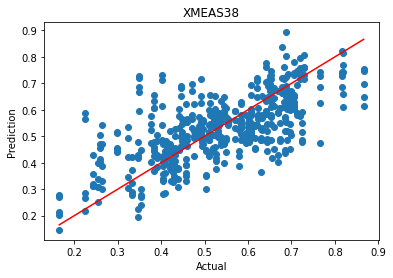

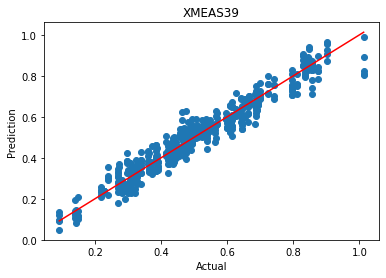

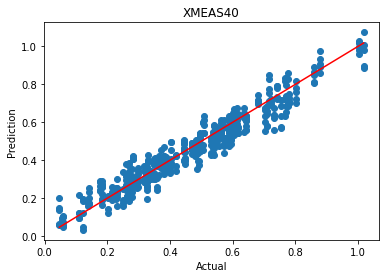

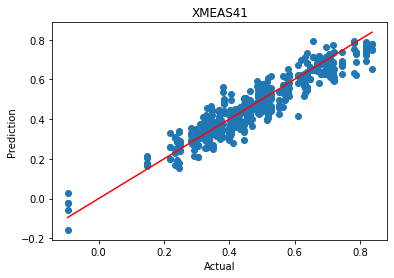

In [9]:
import matplotlib.pyplot as plt
for i in range(input_dim):
  plt.scatter(X_test_scaled[:,i], X_pred[:,i])
  plt.plot([min(X_test_scaled[:,i]),max(X_test_scaled[:,i])],[min(X_test_scaled[:,i]),max(X_test_scaled[:,i])],color='r')
  plt.xlabel('Actual')
  plt.ylabel('Prediction')
  plt.title(data.columns[i])
  plt.show()

In [20]:
! pip install statsmodels

In [12]:
import numpy as np
from statsmodels.nonparametric.kde import KDEUnivariate

def SPE(reconstruction_error): 
  spe = np.sum(reconstruction_error**2, axis=1)
  return spe 

def SPE_CL(reconstruction_error, alpha=0.95):
  spe = np.sum(reconstruction_error**2, axis=1)
  kde_spe = KDEUnivariate(spe)
  kde_spe.fit()
  spe_cl = kde_spe.icdf[int(alpha*len(kde_spe.icdf))]
  return spe_cl

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
data_fault1 = pd.read_csv('./Data/data1.csv', index_col=0)
data_fault1.describe()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,XMEAS11,XMEAS12,XMEAS13,XMEAS14,XMEAS15,XMEAS16,XMEAS17,XMEAS18,XMEAS19,XMEAS20,XMEAS21,XMEAS22,XMEAS23,XMEAS24,XMEAS25,XMEAS26,XMEAS27,XMEAS28,XMEAS29,XMEAS30,XMEAS31,XMEAS32,XMEAS33,XMEAS34,XMEAS35,XMEAS36,XMEAS37,XMEAS38,XMEAS39,XMEAS40,XMEAS41
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.00000,960.000000,960.000000,960.000000,960.00000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,0.674955,3655.144687,4493.088021,8.891162,26.897168,42.294267,2709.805208,75.064707,120.400292,0.320791,80.030026,49.980670,2638.483229,25.112325,49.956694,3107.216562,22.969160,67.688014,270.227260,340.771656,94.647469,77.221280,32.06586,8.898029,26.509092,6.882633,18.78305,1.691617,32.763452,13.815692,24.176669,1.253069,18.552577,2.306561,4.824644,2.290530,0.018196,0.836985,0.100095,53.703448,43.831130
std,0.209905,34.632029,63.453774,0.282795,0.206364,0.237461,25.501441,0.947238,0.018866,0.020530,0.606744,0.977623,25.906190,1.026281,1.003653,25.357780,0.610884,1.603307,37.764446,5.178695,0.227112,0.448069,0.73087,0.129993,0.848165,0.110749,0.51184,0.039759,1.028842,0.162282,1.249392,0.116228,0.696270,0.053189,0.135255,0.078128,0.009203,0.055676,0.011107,0.516324,0.564744
min,0.180200,3523.100000,4216.100000,8.074400,26.216000,41.628000,2652.000000,71.447000,120.340000,0.238750,77.362000,47.348000,2577.300000,21.945000,47.059000,3057.000000,21.158000,64.522000,225.510000,326.160000,93.790000,75.266000,29.13500,8.483000,24.505000,6.504000,16.93100,1.530800,28.590000,13.199000,21.400000,0.921690,15.834000,2.087800,4.218500,1.911700,-0.012637,0.653220,0.069871,52.299000,42.225000
25%,0.682792,3632.950000,4459.075000,8.726375,26.760000,42.133750,2698.375000,74.518500,120.390000,0.310048,79.882500,49.325250,2626.875000,24.470000,49.249750,3096.475000,22.530000,66.703750,243.142500,338.955000,94.521000,77.058750,31.84375,8.813900,26.094000,6.809275,18.51950,1.669750,32.531000,13.725000,23.600750,1.175950,18.255500,2.279475,4.781925,2.250150,0.011331,0.817565,0.093327,53.361000,43.467000
50%,0.751200,3655.600000,4499.000000,8.837550,26.895500,42.293500,2705.000000,75.005500,120.400000,0.320440,80.136500,49.957000,2633.800000,25.119000,49.950000,3102.300000,22.972000,67.765000,266.415000,341.070000,94.635000,77.256000,32.15150,8.897350,26.335000,6.883700,18.75500,1.695650,32.898000,13.818500,23.963500,1.249650,18.557500,2.316600,4.843200,2.296850,0.018241,0.836385,0.100970,53.682000,43.820500
75%,0.788720,3678.300000,4531.625000,9.026625,27.039000,42.448250,2714.125000,75.553250,120.410000,0.332025,80.356250,50.659750,2643.125000,25.816500,50.687000,3109.225000,23.403750,68.145250,275.855000,342.800000,94.766250,77.483250,32.42575,8.979975,26.677750,6.958900,19.05825,1.717725,33.211500,13.905250,24.344750,1.327700,18.869750,2.344225,4.902125,2.338450,0.025036,0.857787,0.107740,54.044750,44.189250
max,0.999310,3759.700000,4710.000000,9.565200,27.539000,43.105000,2820.500000,78.840000,120.470000,0.400550,81.349000,52.916000,2748.100000,28.427000,52.696000,3229.500000,25.094000,72.831000,394.860000,357.480000,95.325000,78.401000,33.96700,9.326600,30.474000,7.207000,20.65700,1.778200,35.572000,14.411000,30.336000,1.576500,20.801000,2.420500,5.123400,2.485200,0.039653,1.014800,0.127160,55.058000,45.277000


In [14]:
X_fault1_scaled = scaler.transform(data_fault1)
X_fault1_pred = model.predict(X_fault1_scaled)
re_fault1 = X_fault1_pred - X_fault1_scaled
spe = SPE(re_fault1)

X_scaled = scaler.transform(data)
X_pred = model.predict(X_scaled)
re_normal = X_pred - X_scaled
spe_cl = SPE_CL(re_normal, alpha=0.95)

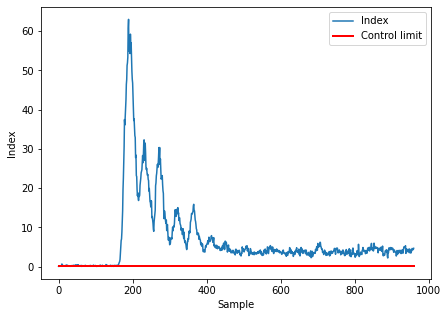

In [15]:
plt.subplots(figsize=(7,5))
plt.plot(spe, label='Index')
control_limit = np.full((len(spe),1), spe_cl)
plt.plot(np.arange(len(spe)), control_limit, color='r', linewidth=2, label='Control limit')
plt.xlabel('Sample')
plt.ylabel('Index')
plt.legend()
plt.show()

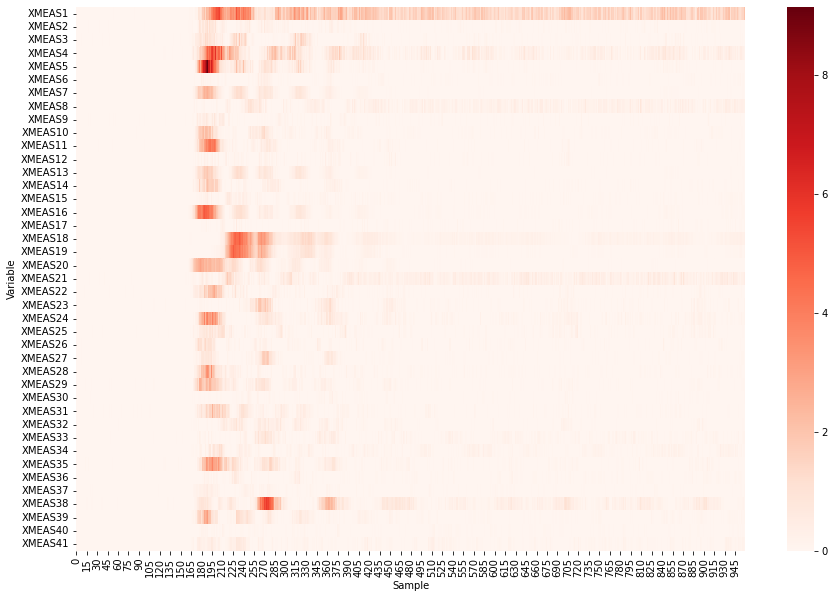

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap((re_fault1**2).T, cmap='Reds')
ax.set_yticklabels(data.columns, rotation=0)
plt.xlabel('Sample')
plt.ylabel('Variable')
plt.show()